<a href="https://colab.research.google.com/github/obaidsi/Audio-mixer-LTspice/blob/main/Filters%26ImportantAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Discret Fourier Transform (DFT) Fast fourier Transform (FFT)

---



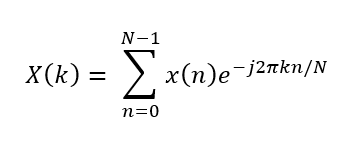

In [2]:
def DFT(x):
  x = np.asarray(x, dtype=complex)
  N = x.size
  n = np.arange(N)
  X = np.zeros(N, dtype=complex)

  for k in range(N):
    X[k] = np.sum(x * np.exp(-1j *2 *np.pi *k *n /N))

  return X


# Test
x = np.random.randn(8)
np.allclose(DFT(x), np.fft.fft(x))

True

In [8]:
import numpy as np

def fft_recursive(x):
    """
    Radix-2 Cooley-Tukey FFT (recursive).
    Input length N must be a power of 2.
    Returns complex spectrum X.
    """
    x = np.asarray(x, dtype=complex)
    N = x.size
    if N == 0:
        return np.array([], dtype=complex)
    if (N & (N - 1)) != 0:
        raise ValueError("Length N must be a power of 2 for radix-2 FFT.")

    if N == 1:
        return x.copy()

    X_even = fft_recursive(x[0::2])
    X_odd  = fft_recursive(x[1::2])

    k = np.arange(N // 2)
    W = np.exp(-1j * 2 * np.pi * k / N)

    top = X_even + W * X_odd
    bot = X_even - W * X_odd
    return np.concatenate([top, bot])

# Test
z = np.random.randn(8)
np.allclose(fft_recursive(z), np.fft.fft(z))

True

In [28]:
def zero_pad(x):
  x = np.asarray(x)
  N = len(x)
  N2 = 1 << (N-1).bit_length()
  if N == N2:
    return x
  y = np.zeros(N2)
  y[:N] =x
  return y

(0.0, 10.0)

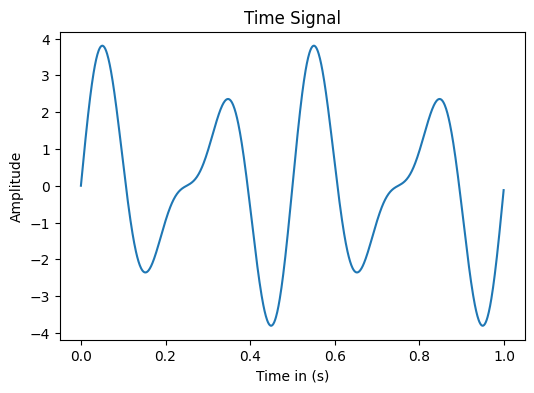

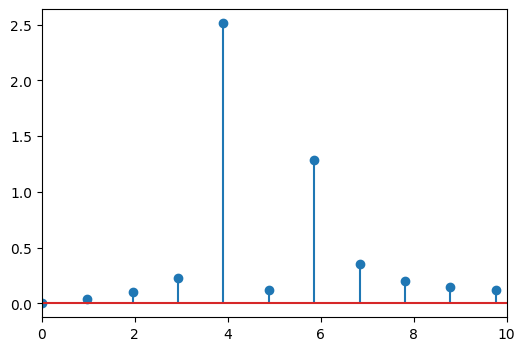

In [30]:
fs = 1000
t = np.arange(0, 1, 1/fs)
x = 2.5 * np.sin(2*np.pi*4*t) + 1.5 * np.sin(2*np.pi*6*t)

plt.figure(figsize =(6, 4))
plt.plot(t, x)
plt.title("Time Signal")
plt.xlabel("Time in (s)")
plt.ylabel("Amplitude")

x = zero_pad(x)
N = len(x)
X = fft_recursive(x)/N
# one side spectrum, and adding the energy back to one side spectrum
X = X[:N//2 +1]
mag = np.abs(X)
mag[1:-1] *= 2

# One side frequency calculation
freqs = np.arange(0, N//2+1) *fs/N

plt.figure(figsize=(6,4))
plt.stem(freqs, mag)
plt.xlim(0, 10)

**Calculating FFT using Numpy libraries**

1100


(0.0, 20.0)

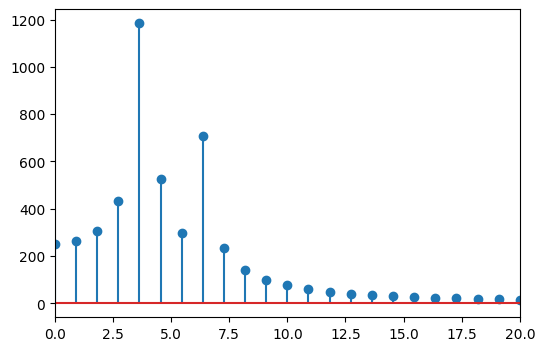

In [42]:
fs = 1000
t = np.arange(0, 1.1, 1/fs)
x = 2.5 * np.sin(2*np.pi*4*t) + 1.5 * np.sin(2*np.pi*6*t)
X = np.fft.rfft(x)
print(len(x))
freqs = np.fft.rfftfreq(len(x), 1/fs)

plt.figure(figsize = (6,4))
plt.stem(freqs, np.abs(X))
plt.xlim(0, 20)